In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Búsqueda en espacios continuos
Inteligencia Artificial - Facundo A. Lucianna - CEIA - FIUBA

Cuando enfrentamos problemas en espacios continuos, los algoritmos que hemos discutido se vuelven prácticamente inaplicables sin algún tipo de discretización. Las excepciones son **gradiente descendente (o ascendente)** y **simulated annealing**, que pueden adaptarse de la siguiente manera:

- Calculamos el gradiente utilizando herramientas de cálculo en varias variables.
- Si la función es muy compleja o imposible de calcular, se pueden utilizar métodos numéricos para aproximar el gradiente.
- Para aplicar algún método estocástico, podemos calcular la derivada direccional o su variante mediante métodos numéricos.
- Con la derivada direccional, podemos aplicar **simulated annealing**.

Para esta búsqueda, utilizaremos la [función de Himmelblau](https://en.wikipedia.org/wiki/Himmelblau%27s_function). Esta función se utiliza comúnmente para probar algoritmos de optimización debido a su forma característica. La expresión matemática de la función de Himmelblau en dos variables *x* e *y* es la siguiente:

$$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

La cual tiene un máximo local en `(-0.270845, -0.923039)`, que se comporta como un valle, lo que hace que una búsqueda de mínimos pueda caer en esa zona. Además, tiene cuatro mínimos de igual valor en los puntos `(3, 2)`, `(-2.8505118, 3.131312)`, `(-3.779310, -3.283186)` y `(3.584428, -1.848126)`. 

Definamos en Python a la función:

In [2]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

Vemos graficamente a la función, con sus minimos y maximos.

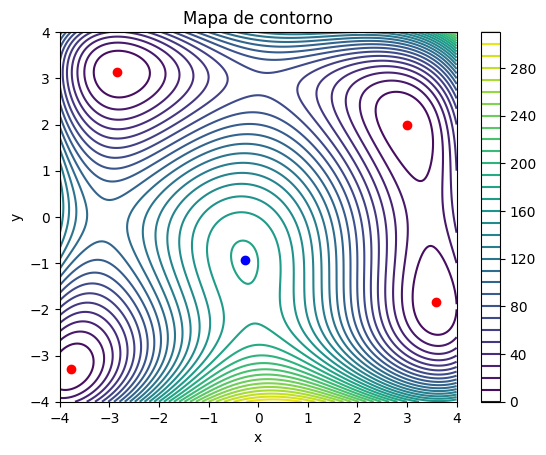

In [3]:
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

plt.contour(X, Y, Z, levels=30) 
plt.colorbar() 
# Graficamos los mínimos
plt.scatter([3, -2.8505118, -3.779310, 3.584428], [2, 3.131312, -3.283186, -1.848126], color='red')
# Y el máximo
plt.scatter(-0.270845, -0.923039, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de contorno')
plt.show()

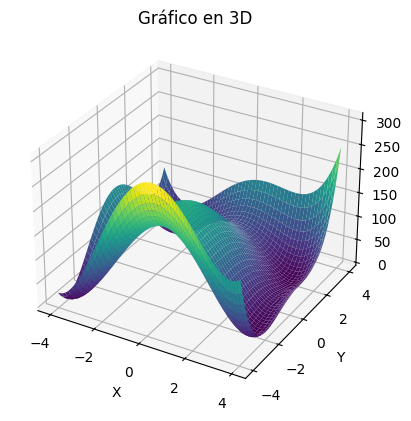

In [4]:
# Grafiquemos en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficamos la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfico en 3D')
plt.show()

## Gradiente descendente usando el gradiente calculado

Comencemos calculando el gradiente descendente en la función de Himmelblau:

$$\nabla f = \left( \frac{\partial f}{\partial x},  \frac{\partial f}{\partial y} \right) = \left( 4x(x^2 + y - 11) + 2(x + y^2 - 7), 2(x^2 + y - 11) + 4y(x + y^2 - 7) \right)  $$

Ahora pasemos el gradiente a una función en Python:

In [5]:
def grad_himmelblau(x, y):
    return 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7), 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)

Con esto, vamos a usar **gradiente descendente**. Para ello, debemos emplear la siguiente fórmula:

$$ X_{new} = X - \alpha \nabla f(X) $$

Este método nos requiere definir el valor de $\alpha$ (tasa de aprendizaje). En este caso, vamos a usar un valor constante para $\alpha$, aunque también se pueden aplicar otras variantes, como comenzar con un valor grande, lo cual generaría pasos iniciales grandes, y luego ir disminuyendo gradualmente la tasa de aprendizaje.

Una diferencia importante con los métodos discretos es que el algoritmo no puede terminar cuando el gradiente es cero, dado que estamos trabajando en un espacio continuo. Esto es prácticamente imposible debido a los errores numéricos. Por lo tanto, para nuestra implementación, si el valor absoluto del gradiente varía menos de `1e-12`, terminamos la ejecución.

In [6]:
alpha = 0.005

max_iteration = 1000

# Iniciamos en un punto específico a modo didáctico, pero en general, se arranca en un valor al azar.
x_new = -2.4169722739821795 
y_new = -2.3589966623281526
f_new = himmelblau(x_new, y_new)

evolution_pos = [(x_new, y_new)]
evolution_value = [f_new]

for iteration in range(max_iteration):
    
    # Calculamos el gradiente en el punto
    delta_x, delta_y = grad_himmelblau(x_new, y_new)
    
    # Movemos en la dirección contraria a gradiente
    x_new -= alpha*delta_x
    y_new -= alpha*delta_y
    f_new = himmelblau(x_new, y_new)
    
    evolution_pos.append((x_new, y_new))
    evolution_value.append(f_new)

    # Si el modulo del gradiente no varia mas
    if np.sqrt(delta_x**2 + delta_y**2) < 1e-12:
        break
        
print(f"Un minimo se encuentra en {(x_new, y_new)}")
print(f"Llevo {iteration} iteraciones")

Un minimo se encuentra en (-3.779310253377743, -3.283185991286163)
Llevo 77 iteraciones


Grafiquemos la evolución del algoritmo de gradiente. En el siguiente diagrama de contorno, vemos cómo el círculo comienza en una posición inicial y va descendiendo hasta uno de los mínimos. El color de círuclo indica el tiempo, siendo azul al principio y rojo cuando finaliza.

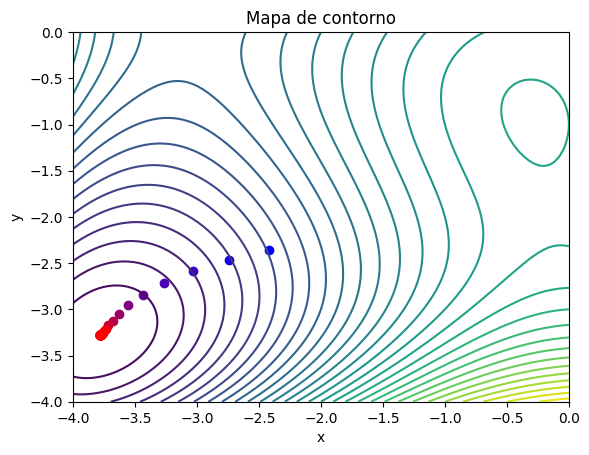

In [7]:
x = np.linspace(-4, 0, 100)
y = np.linspace(-4, 0, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

color_dem = 10

plt.contour(X, Y, Z, levels=30) 
for index, search_coords in enumerate(evolution_pos):
    color=(index/color_dem, 0, (color_dem - index)/color_dem)
    if index > 10:
        color = (1, 0, 0)
    plt.scatter(search_coords[0], search_coords[1], color=color)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de contorno')
plt.show()

El problema es que, en algunos casos, no podemos calcular el gradiente de manera directa. En esos casos, usamos un método aproximado.

En este caso, vamos a estimar las derivadas del gradiente utilizando un esquema de diferencia central:

In [8]:
def graf_himmelblau_estimated(x, y, delta_x, delta_y):
    
    f_x_up = himmelblau(x + delta_x, y)
    f_x_down = himmelblau(x - delta_x, y)
    
    f_y_up = himmelblau(x, y + delta_y)
    f_y_down = himmelblau(x, y - delta_y)
    
    # Calculamos la derivada parcial para cada variable usando diferencia central
    return (f_x_up - f_x_down) / 2*delta_x, (f_y_up - f_y_down) / 2*delta_y

In [9]:
alpha = 0.5

max_iteration = 1000

# Iniciamos en un punto específico a modo didáctico, pero en general, se arranca en un valor al azar.
x_new = -2.4169722739821795 
y_new = -2.3589966623281526

delta_x_upwind = 0.1
delta_y_upwind = 0.1

f_new = himmelblau(x_new, y_new)

evolution_pos = [(x_new, y_new)]
evolution_value = [f_new]

for iteration in range(max_iteration):
    
    # Calculamos el gradiente en el punto
    delta_x, delta_y = graf_himmelblau_estimated(x_new, y_new, delta_x_upwind, delta_y_upwind)
    
    # Movemos en la dirección contraria a gradiente
    x_new -= alpha*delta_x
    y_new -= alpha*delta_y
    f_new = himmelblau(x_new, y_new)
    
    evolution_pos.append((x_new, y_new))
    evolution_value.append(f_new)
    
    if np.sqrt(delta_x**2 + delta_y**2) < 1e-12:
        break
            
print(f"Un minimo se encuentra en {(x_new, y_new)}")
print(f"Llevo {iteration} iteraciones")

Un minimo se encuentra en (-3.7775075065187442, -3.2811196886926344)
Llevo 67 iteraciones


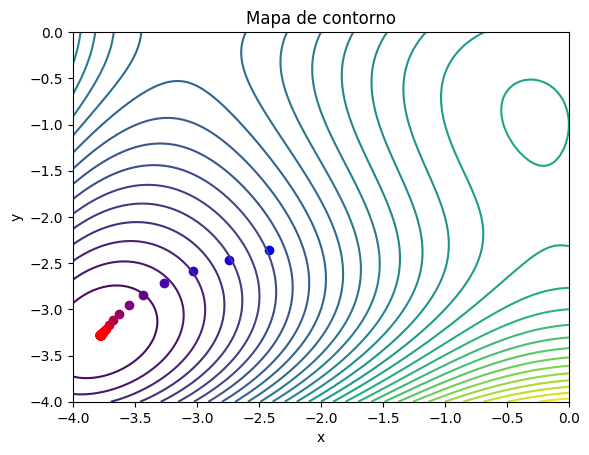

In [10]:
x = np.linspace(-4, 0, 100)
y = np.linspace(-4, 0, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

color_dem = 10

plt.contour(X, Y, Z, levels=30)
for index, search_coords in enumerate(evolution_pos):
    color=(index/color_dem, 0, (color_dem - index)/color_dem)
    if index > 10:
        color = (1, 0, 0)
        
    plt.scatter(search_coords[0], search_coords[1], color=color)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de contorno')
plt.show()

**Nota**: Se deja como tarea la implementación de derivada direccional y por consiguiente la implementación de un gradiente descendiente estocástico o de simulated annealing.